# Data Preprocessing and Visualization - Half Marathon Training Dataset

### Import neccessay packages

In [902]:
import pandas as pd
import numpy as np
from tabulate import tabulate

### Retrieve the dataset

This dataset was retrieved from my personal Strava application.

In [903]:
df = pd.read_csv("activities.csv")
df.head()

,Activity ID,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Commute,Activity Private Note,Activity Gear,Filename,Athlete Weight,Bike Weight,Elapsed Time.1,Moving Time,Distance.1,Max Speed,Average Speed,Elevation Gain,Elevation Loss,Elevation Low,Elevation High,Max Grade,Average Grade,Average Positive Grade,Average Negative Grade,Max Cadence,Average Cadence,Max Heart Rate.1,Average Heart Rate,Max Watts,Average Watts,Calories,Max Temperature,Average Temperature,Relative Effort.1,Total Work,Number of Runs,Uphill Time,Downhill Time,Other Time,Perceived Exertion,Type,Start Time,Weighted Average Power,Power Count,Prefer Perceived Exertion,Perceived Relative Effort,Commute.1,Total Weight Lifted,From Upload,Grade Adjusted Distance,Weather Observation Time,Weather Condition,Weather Temperature,Apparent Temperature,Dewpoint,Humidity,Weather Pressure,Wind Speed,Wind Gust,Wind Bearing,Precipitation Intensity,Sunrise Time,Sunset Time,Moon Phase,Bike,Gear,Precipitation Probability,Precipitation Type,Cloud Cover,Weather Visibility,UV Index,Weather Ozone,Jump Count,Total Grit,Average Flow,Flagged,Average Elapsed Speed,Dirt Distance,Newly Explored Distance,Newly Explored Dirt Distance,Activity Count,Total Steps,Carbon Saved,Pool Length,Training Load,Intensity,Average Grade Adjusted Pace,Timer Time,Total Cycles,Media
0,12131976956,"5 Aug 2024, 22:43:43",Morning Run,Run,NaN,606352,3.51,NaN,NaN,False,NaN,NaN,activities/12131976956.gpx,NaN,NaN,606352.0,2844.0,3518.389893,11.488000,1.237127,6.900000,2.850000,9.500000,16.500000,15.341868,-0.017053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,3543.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.005803,0.000000,NaN,NaN,NaN,4066.0,NaN,NaN,NaN,NaN,1.245781,NaN,NaN,NaN
1,12140919676,"12 Aug 2024, 23:09:54",Morning Run,Run,NaN,2631,6.28,NaN,NaN,False,NaN,NaN,activities/12140919676.gpx,NaN,NaN,2631.0,2141.0,6279.640137,16.093945,2.933041,27.132763,26.286732,9.500000,18.299999,12.643749,0.004777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,6314.100098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.386788,0.000000,NaN,NaN,NaN,5168.0,NaN,NaN,NaN,NaN,2.949136,NaN,NaN,NaN
2,12141197813,"13 Aug 2024, 22:55:27",Morning Run,Run,NaN,2708,5.48,NaN,NaN,False,NaN,NaN,activities/12141197813.gpx,NaN,NaN,2708.0,2482.0,5480.869629,4.606055,2.208247,20.094465,20.720242,9.500000,17.600000,15.306428,-0.007298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,5515.799805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.023955,1041.099976,NaN,NaN,NaN,6872.0,NaN,NaN,NaN,NaN,2.222321,NaN,NaN,media/DE676412-33DC-4A77-ADA4-D7FBFCDF669E.mp4
3,12166083913,"16 Aug 2024, 23:03:21",Morning Run,Run,NaN,1615,3.30,NaN,NaN,False,NaN,NaN,activities/12166083913.gpx,NaN,NaN,1615.0,1440.0,3308.830078,4.147998,2.297799,31.823040,25.650312,44.900002,53.099998,7.954543,0.169244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,3365.199951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.048811,0.000000,NaN,NaN,NaN,4084.0,NaN,NaN,NaN,NaN,2.336944,NaN,NaN,media/E1C13B20-1EAE-48EC-BAF7-86C2B0D6A270.jpg
4,12185326527,"19 Aug 2024, 08:45:49",Evening Run,Run,NaN,1792,3.78,NaN,NaN,False,NaN,NaN,activities/12185326527.gpx,NaN,NaN,1792.0,1548.0,3781.760010,4.518018,2.442997,27.883493,22.000885,44.900002,52.900002,13.268985,0.137502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,3825.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Part 1: Data Cleaning and Preprocessing

### (1) Dropping unneccesary columns

There are too many unneccesary features, so some features will be removed.

In [904]:
df.shape

(105, 94)

In [905]:
df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['Activity ID', 'Activity Date', 'Activity Name', 'Activity Type',
       'Activity Description', 'Elapsed Time', 'Distance', 'Max Heart Rate',
       'Relative Effort', 'Commute', 'Activity Private Note', 'Activity Gear',
       'Filename', 'Athlete Weight', 'Bike Weight', 'Elapsed Time.1',
       'Moving Time', 'Distance.1', 'Max Speed', 'Average Speed',
       'Elevation Gain', 'Elevation Loss', 'Elevation Low', 'Elevation High',
       'Max Grade', 'Average Grade', 'Average Positive Grade',
       'Average Negative Grade', 'Max Cadence', 'Average Cadence',
       'Max Heart Rate.1', 'Average Heart Rate', 'Max Watts', 'Average Watts',
       'Calories', 'Max Temperature', 'Average Temperature',
       'Relative Effort.1', 'Total Work', 'Number of Runs', 'Uphill Time',
       'Downhill Time', 'Other Time', 'Perceived Exertion', 'Type',
       'Start Time', 'Weighted Average Power', 'Power Count',
       'Prefer Perceived Exertion', 'Perceiv

There are many null columns in my dataset because I previously had a Strava Premium subscription, which provided access to additional running metrics. After canceling the subscription, those features became unavailable and now appear as null values. Therefore, these columns will be removed from the dataset.

In [906]:
df = df.drop(df.iloc[:,7:15], axis = 1)
df = df.drop(columns = ['Activity ID','Activity Description','Average Positive Grade', 'Elapsed Time.1',
       'Average Negative Grade', 'Max Cadence', 'Average Cadence', 'Distance.1',
       'Max Heart Rate.1', 'Average Heart Rate', 'Max Watts', 'Average Watts',
       'Calories', 'Max Temperature', 'Average Temperature',
       'Relative Effort.1', 'Total Work', 'Number of Runs', 'Uphill Time',
       'Downhill Time', 'Other Time', 'Perceived Exertion', 'Type',
       'Start Time', 'Weighted Average Power', 'Power Count',
       'Prefer Perceived Exertion', 'Perceived Relative Effort', 'Commute.1',
       'Total Weight Lifted', 'From Upload', 'Weather Observation Time', 'Weather Condition', 'Weather Temperature',
       'Apparent Temperature', 'Dewpoint', 'Humidity', 'Weather Pressure',
       'Wind Speed', 'Wind Gust', 'Wind Bearing', 'Precipitation Intensity',
       'Sunrise Time', 'Sunset Time', 'Moon Phase', 'Bike', 'Gear',
       'Precipitation Probability', 'Precipitation Type', 'Cloud Cover',
       'Weather Visibility', 'UV Index', 'Weather Ozone', 'Jump Count',
       'Total Grit', 'Average Flow', 'Flagged', 'Dirt Distance', 'Newly Explored Distance',
       'Newly Explored Dirt Distance', 'Activity Count', 'Carbon Saved', 'Pool Length', 'Training Load', 'Intensity', 'Timer Time', 'Total Cycles', 'Media'])


Now, I got only 21 features and 100 observations.

In [907]:
df.shape

(105, 18)

In [908]:
df.head()

,Activity Date,Activity Name,Activity Type,Elapsed Time,Distance,Moving Time,Max Speed,Average Speed,Elevation Gain,Elevation Loss,Elevation Low,Elevation High,Max Grade,Average Grade,Grade Adjusted Distance,Average Elapsed Speed,Total Steps,Average Grade Adjusted Pace
0,"5 Aug 2024, 22:43:43",Morning Run,Run,606352,3.51,2844.0,11.488000,1.237127,6.900000,2.850000,9.500000,16.500000,15.341868,-0.017053,3543.000000,0.005803,4066.0,1.245781
1,"12 Aug 2024, 23:09:54",Morning Run,Run,2631,6.28,2141.0,16.093945,2.933041,27.132763,26.286732,9.500000,18.299999,12.643749,0.004777,6314.100098,2.386788,5168.0,2.949136
2,"13 Aug 2024, 22:55:27",Morning Run,Run,2708,5.48,2482.0,4.606055,2.208247,20.094465,20.720242,9.500000,17.600000,15.306428,-0.007298,5515.799805,2.023955,6872.0,2.222321
3,"16 Aug 2024, 23:03:21",Morning Run,Run,1615,3.30,1440.0,4.147998,2.297799,31.823040,25.650312,44.900002,53.099998,7.954543,0.169244,3365.199951,2.048811,4084.0,2.336944
4,"19 Aug 2024, 08:45:49",Evening Run,Run,1792,3.78,1548.0,4.518018,2.442997,27.883493,22.000885,44.900002,52.900002,13.268985,0.137502,3825.500000,2.110357,4346.0,2.471253


### Data Feature Descriptions

In [909]:
feature_table = [
    ['Name', 'Data Type', 'Description'],
    ['Activity ID', 'Nominal Categorical', 'Activity ID'],
    ['Activity Date', 'Nominal Categorical', 'Activity Date'],
    ['Activity Name', 'Nominal Categorical', 'The title given to the activity'],
    ['Activity Type', 'Nominal Categorical', 'Type of Activity (e.g., Run, Walk, Cycle)'],
    ['Elapsed Time', 'Numeric', 'Total time from start to finish of the activity (including pauses), in seconds'],
    ['Distance', 'Numeric', 'Total distance covered in the activity, in kilometers'],
    ['Moving Time', 'Numeric', 'Actual time spent moving during the activity, in seconds'],
    ['Max Speed', 'Numeric', 'Maximum speed reached during the activity, in km/h'],
    ['Average Speed', 'Numeric', 'Average speed over the entire activity, in km/h'],
    ['Elevation Gain', 'Numeric', 'Total elevation gained during the activity, in meters'],
    ['Elevation Loss', 'Numeric', 'Total elevation lost during the activity, in meters'],
    ['Elevation Low', 'Numeric', 'Lowest elevation point during the activity, in meters'],
    ['Elevation High', 'Numeric', 'Highest elevation point during the activity, in meters'],
    ['Max Grade', 'Numeric', 'Maximum gradient (steepness) encountered during the activity'],
    ['Average Grade', 'Numeric', 'Average gradient across the entire activity'],
    ['Grade Adjusted Distance', 'Numeric', 'Distance adjusted based on elevation changes'],
    ['Average Elapsed Speed', 'Numeric', 'Average speed calculated over elapsed time'],
    ['Total Steps', 'Numeric', 'Total Steps'],
    ['Average Grade Adjusted Pace', 'Numeric', 'Pace adjusted for gradient/elevation']
]

print(tabulate(feature_table, headers='firstrow', tablefmt='fancy_grid'))


╒═════════════════════════════╤═════════════════════╤════════════════════════════════════════════════════════════════════════════════╕
│ Name                        │ Data Type           │ Description                                                                    │
╞═════════════════════════════╪═════════════════════╪════════════════════════════════════════════════════════════════════════════════╡
│ Activity ID                 │ Nominal Categorical │ Activity ID                                                                    │
├─────────────────────────────┼─────────────────────┼────────────────────────────────────────────────────────────────────────────────┤
│ Activity Date               │ Nominal Categorical │ Activity Date                                                                  │
├─────────────────────────────┼─────────────────────┼────────────────────────────────────────────────────────────────────────────────┤
│ Activity Name               │ Nominal Categorical │ T

### (2) Extract only "Run" in Activity Type column

Since the primary goal of this project is to predict half marathon times, I chose to analyze only the "Run" activities from the Activity Type column. Other activity types, such as hike or walk, are excluded at this stage to ensure the analysis focuses solely on relevant running data.

In [910]:
not_run = df["Activity Type"] != "Run"
df = df[~not_run]

In [911]:
df.shape
# 5 rows have been removed

(100, 18)

### (3) Extract only Date from 'Activity Date' columns

I want to keep only date in 'Activity Date' columns

In [912]:
df['Activity Date'] = df['Activity Date'].str.split(',').str.get(0)

In [913]:
df.head()

,Activity Date,Activity Name,Activity Type,Elapsed Time,Distance,Moving Time,Max Speed,Average Speed,Elevation Gain,Elevation Loss,Elevation Low,Elevation High,Max Grade,Average Grade,Grade Adjusted Distance,Average Elapsed Speed,Total Steps,Average Grade Adjusted Pace
0,5 Aug 2024,Morning Run,Run,606352,3.51,2844.0,11.488000,1.237127,6.900000,2.850000,9.500000,16.500000,15.341868,-0.017053,3543.000000,0.005803,4066.0,1.245781
1,12 Aug 2024,Morning Run,Run,2631,6.28,2141.0,16.093945,2.933041,27.132763,26.286732,9.500000,18.299999,12.643749,0.004777,6314.100098,2.386788,5168.0,2.949136
2,13 Aug 2024,Morning Run,Run,2708,5.48,2482.0,4.606055,2.208247,20.094465,20.720242,9.500000,17.600000,15.306428,-0.007298,5515.799805,2.023955,6872.0,2.222321
3,16 Aug 2024,Morning Run,Run,1615,3.30,1440.0,4.147998,2.297799,31.823040,25.650312,44.900002,53.099998,7.954543,0.169244,3365.199951,2.048811,4084.0,2.336944
4,19 Aug 2024,Evening Run,Run,1792,3.78,1548.0,4.518018,2.442997,27.883493,22.000885,44.900002,52.900002,13.268985,0.137502,3825.500000,2.110357,4346.0,2.471253


### (4) Check for Missing Value

There is no missing value in this dataset.

In [914]:
df.isna().sum()

Activity Date                  0
Activity Name                  0
Activity Type                  0
Elapsed Time                   0
Distance                       0
Moving Time                    0
Max Speed                      0
Average Speed                  0
Elevation Gain                 0
Elevation Loss                 0
Elevation Low                  0
Elevation High                 0
Max Grade                      0
Average Grade                  0
Grade Adjusted Distance        0
Average Elapsed Speed          0
Total Steps                    0
Average Grade Adjusted Pace    0
dtype: int64

### (5) Convert the "Moving Time" and "Elapsed Time" columns to Minutes

In [915]:
df["Moving Time"] = round(df["Moving Time"] / 60, 2)
df["Elapsed Time"] = round(df["Elapsed Time"] / 60, 2)

In [916]:
df.head()

,Activity Date,Activity Name,Activity Type,Elapsed Time,Distance,Moving Time,Max Speed,Average Speed,Elevation Gain,Elevation Loss,Elevation Low,Elevation High,Max Grade,Average Grade,Grade Adjusted Distance,Average Elapsed Speed,Total Steps,Average Grade Adjusted Pace
0,5 Aug 2024,Morning Run,Run,10105.87,3.51,47.40,11.488000,1.237127,6.900000,2.850000,9.500000,16.500000,15.341868,-0.017053,3543.000000,0.005803,4066.0,1.245781
1,12 Aug 2024,Morning Run,Run,43.85,6.28,35.68,16.093945,2.933041,27.132763,26.286732,9.500000,18.299999,12.643749,0.004777,6314.100098,2.386788,5168.0,2.949136
2,13 Aug 2024,Morning Run,Run,45.13,5.48,41.37,4.606055,2.208247,20.094465,20.720242,9.500000,17.600000,15.306428,-0.007298,5515.799805,2.023955,6872.0,2.222321
3,16 Aug 2024,Morning Run,Run,26.92,3.30,24.00,4.147998,2.297799,31.823040,25.650312,44.900002,53.099998,7.954543,0.169244,3365.199951,2.048811,4084.0,2.336944
4,19 Aug 2024,Evening Run,Run,29.87,3.78,25.80,4.518018,2.442997,27.883493,22.000885,44.900002,52.900002,13.268985,0.137502,3825.500000,2.110357,4346.0,2.471253


Since moving time is now in minutes, I adjusted the average speed by multiplying by 60 to convert it from km/min to the standard km/h.

In [917]:
df['Average Speed'] = round((df['Distance'] / df['Moving Time']) * 60,2)

### (6) Create a New column, called "Pace" and "Season"

Pace is typically expressed as time per unit of distance. To calculate my pace, I need to devide the moving time by distance.

In [918]:
df["Pace"] = round(df["Moving Time"] / df["Distance"], 2)

In [919]:
print(df["Pace"])

0      13.50
1       5.68
2       7.55
3       7.27
4       6.83
       ...  
100     6.36
101     6.59
102     6.71
103     6.81
104     6.82
Name: Pace, Length: 100, dtype: float64


I also want to see the different of my performance through diffent seasons.

In [920]:
df['Activity Date'] = pd.to_datetime(df['Activity Date'])

season_map = {'Dec': 'Summer', 'Jan': 'Summer', 'Feb': 'Summer',
    'Mar': 'Autumn', 'Apr': 'Autumn', 'May': 'Autumn',
    'Jun': 'Winter', 'Jul': 'Winter', 'Aug': 'Winter',
    'Sep': 'Spring', 'Oct': 'Spring', 'Nov': 'Spring'}
df['Season'] = df['Activity Date'].dt.strftime('%b').map(season_map)

In [921]:
df['Season']

0      Winter
1      Winter
2      Winter
3      Winter
4      Winter
        ...  
100    Winter
101    Winter
102    Winter
103    Winter
104    Winter
Name: Season, Length: 100, dtype: object

### (5) Convert Data Types

Most features in this dataset are numerical feature. Activity Name and Activity Type will be converted from numeric to categorical feature.

In [922]:
df.dtypes

Activity Date                  datetime64[ns]
Activity Name                          object
Activity Type                          object
Elapsed Time                          float64
Distance                              float64
Moving Time                           float64
Max Speed                             float64
Average Speed                         float64
Elevation Gain                        float64
Elevation Loss                        float64
Elevation Low                         float64
Elevation High                        float64
Max Grade                             float64
Average Grade                         float64
Grade Adjusted Distance               float64
Average Elapsed Speed                 float64
Total Steps                           float64
Average Grade Adjusted Pace           float64
Pace                                  float64
Season                                 object
dtype: object

In [923]:
#Change to categorical feature
cat_fea = ["Activity Name", "Activity Type"]
df[cat_fea] = df[cat_fea].astype("category")

In [924]:
df.dtypes

Activity Date                  datetime64[ns]
Activity Name                        category
Activity Type                        category
Elapsed Time                          float64
Distance                              float64
Moving Time                           float64
Max Speed                             float64
Average Speed                         float64
Elevation Gain                        float64
Elevation Loss                        float64
Elevation Low                         float64
Elevation High                        float64
Max Grade                             float64
Average Grade                         float64
Grade Adjusted Distance               float64
Average Elapsed Speed                 float64
Total Steps                           float64
Average Grade Adjusted Pace           float64
Pace                                  float64
Season                                 object
dtype: object

After converting the Activity Date column to a date data type, its format changed from "5 Aug 2024" to the standard ISO format: "2024-08-05"

In [925]:
print(df["Activity Date"])

0     2024-08-05
1     2024-08-12
2     2024-08-13
3     2024-08-16
4     2024-08-19
         ...    
100   2025-06-05
101   2025-06-10
102   2025-06-17
103   2025-06-18
104   2025-06-23
Name: Activity Date, Length: 100, dtype: datetime64[ns]


### (6) Check Outlier by Visualizing Box-Plot

I recall an instance when I forgot to turn off Strava after finishing a run and ended up taking the bus while the app was still recording. This likely introduced an outlier in the dataset. The outlier can be identified through the Elapsed Time, which represents the total duration from the start to the end of an activity, including any pauses. As shown in Figure 1, one data point has an exceptionally high elapsed time. To correct this, the Elapsed Time for that activity will be replaced with the Moving Time, which reflects only the time during which movement actually occurred, excluding pauses or idle time.

Although other outliers are visible in different columns, they will be retained, as they reflect genuine data points that represent my actual running progress and performance over time.

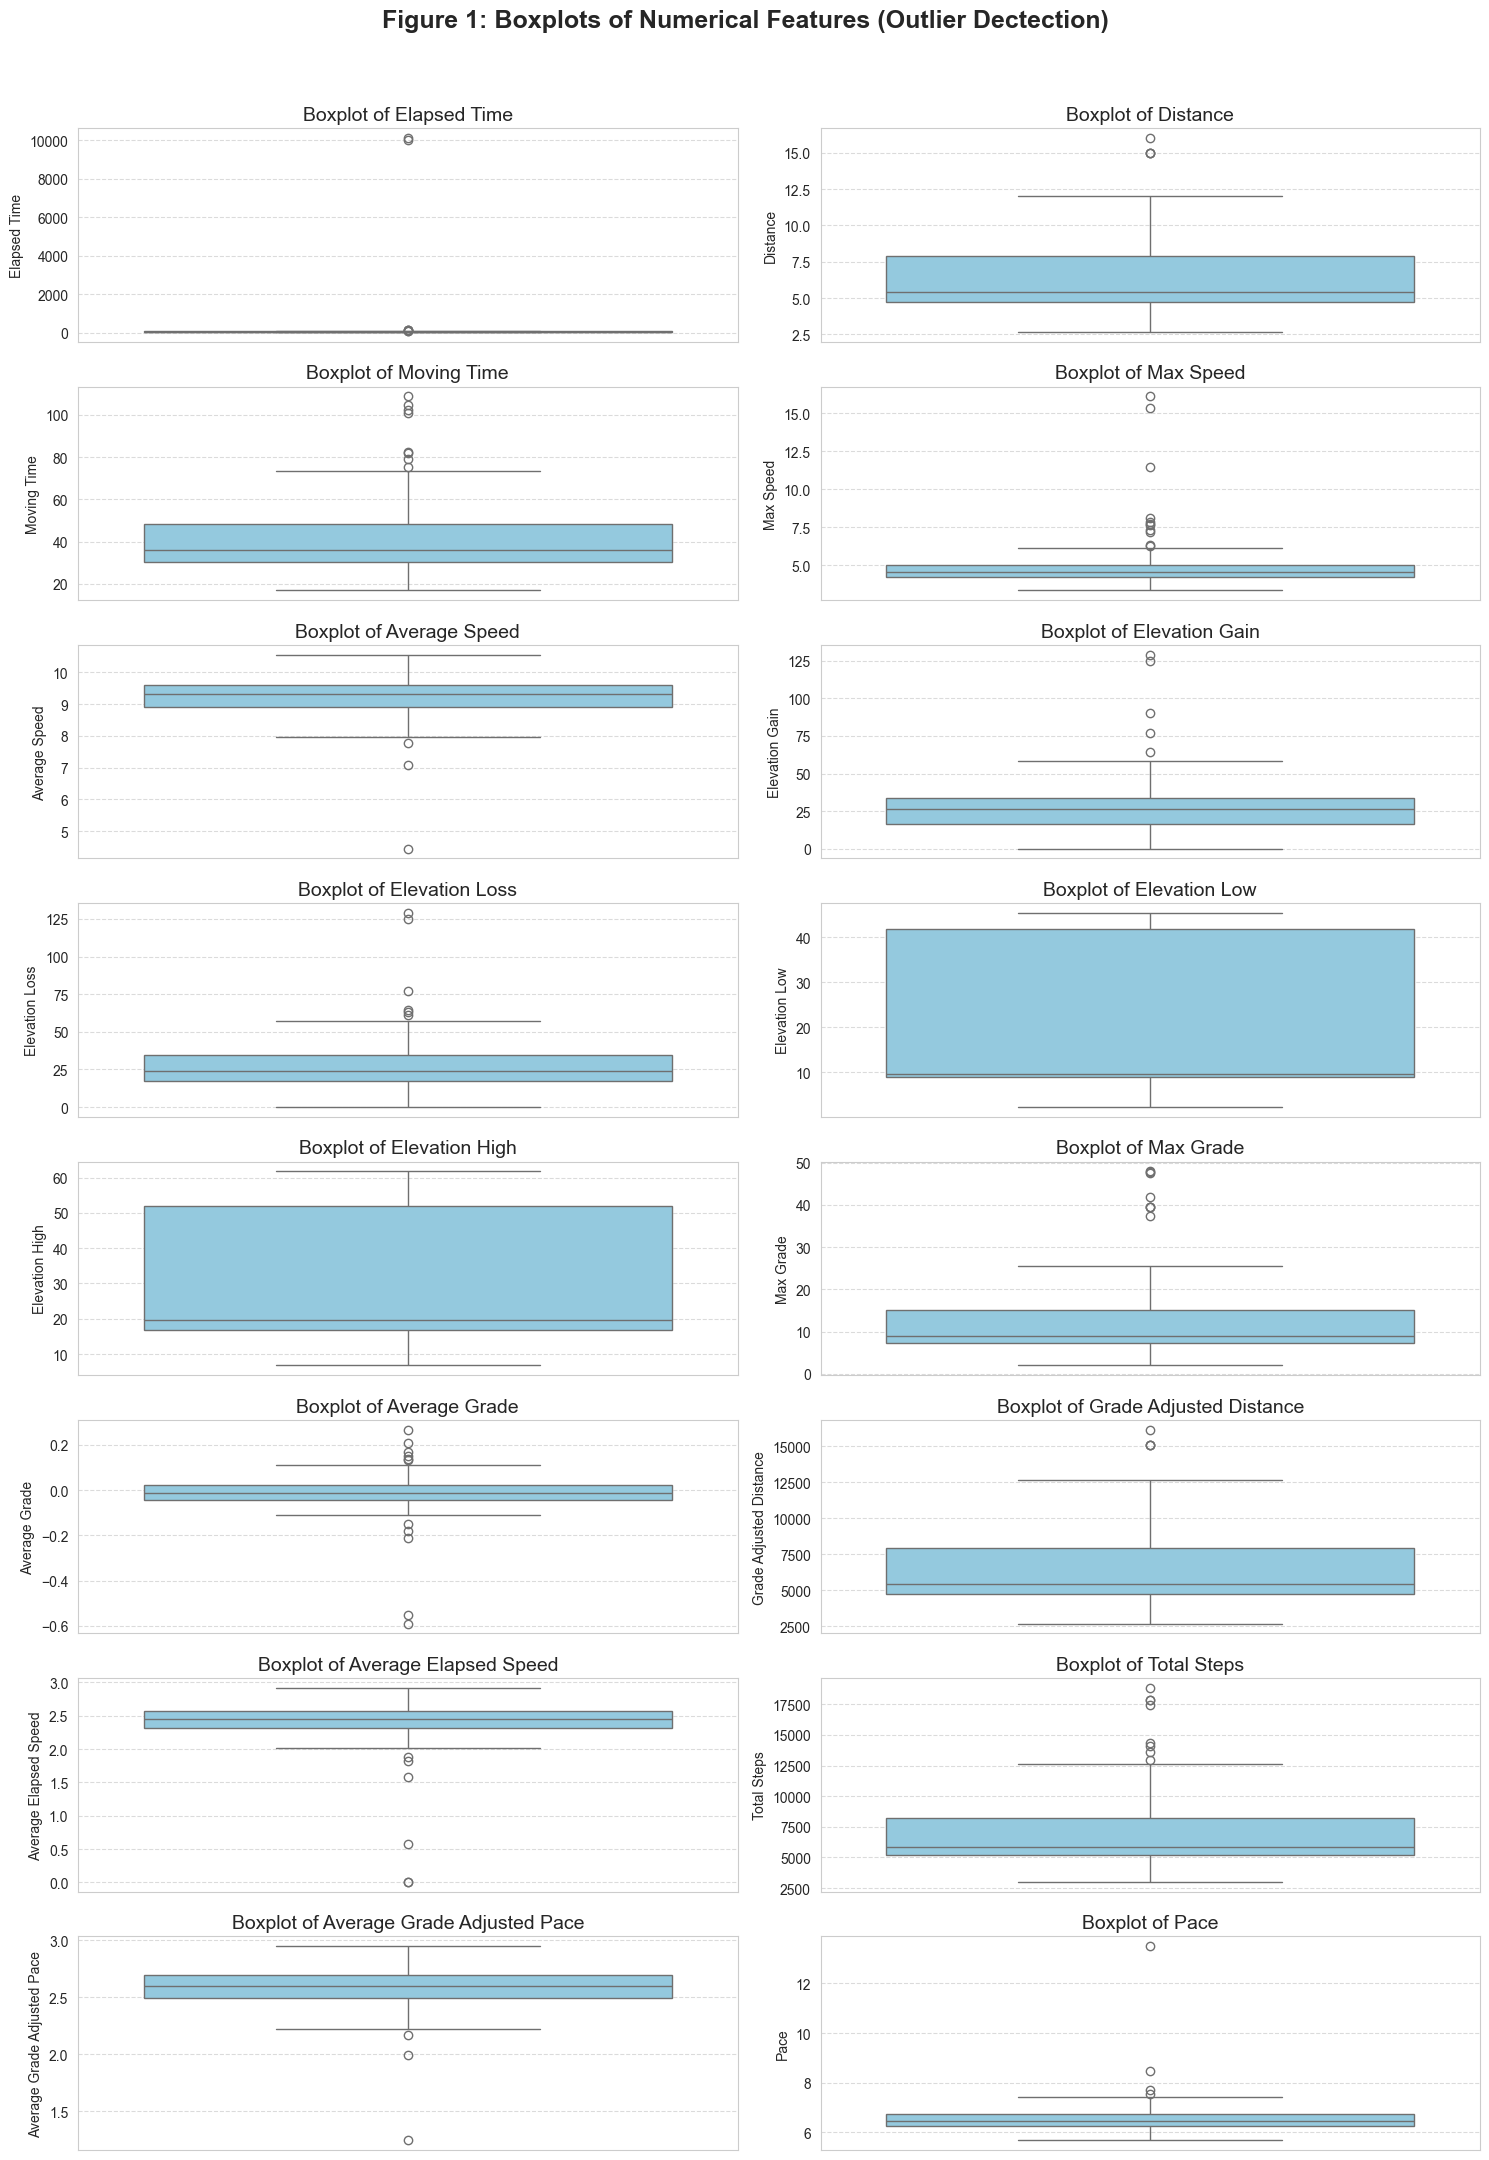

In [926]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = df.select_dtypes(include = ["float64", "int64"])

fig, axes = plt.subplots(8,2, figsize = (15,22))
fig.suptitle("Figure 1: Boxplots of Numerical Features (Outlier Dectection)", fontsize = 18, fontweight = "bold")

axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(y = df[col], ax = axes[i], color = 'skyblue')
    axes[i].set_title(f'Boxplot of {col}', fontsize=14)
    axes[i].grid(axis = 'y', linestyle = '--', alpha  = 0.7)

for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

The observations that its Elapsed Time is more than 10000 minutes are replaced by its Moving Time.

In [927]:
df_cleaned = df.copy()
df_cleaned['Elapsed Time'] = np.where(df_cleaned['Elapsed Time'] > 10000,
                                      df_cleaned['Moving Time'],
                                      df_cleaned['Elapsed Time'])

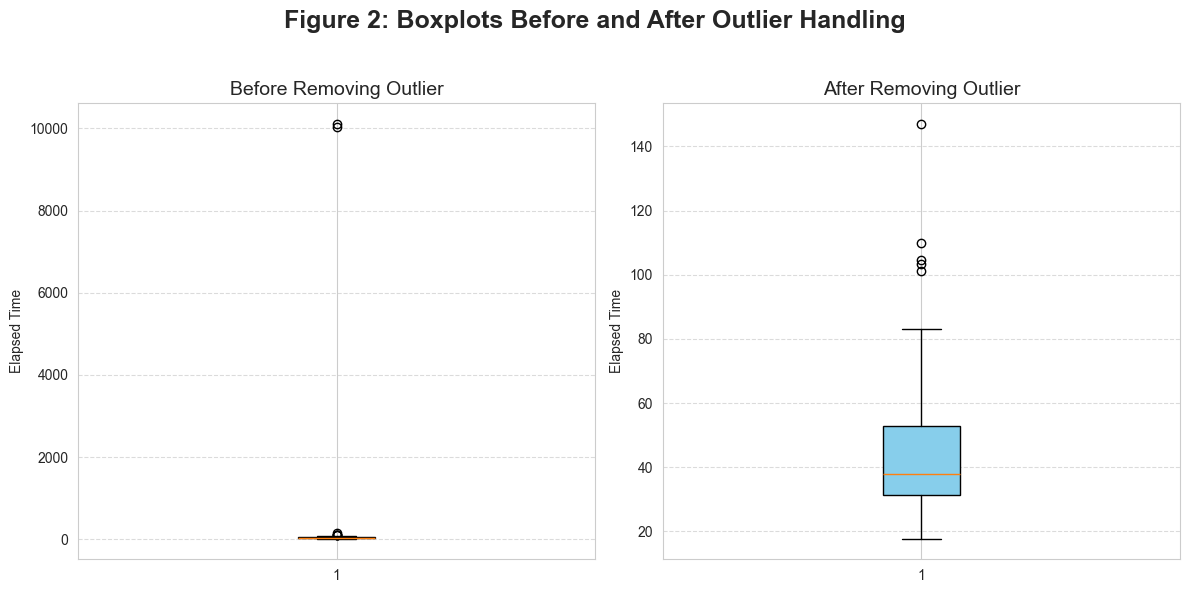

In [928]:
plt.figure(figsize = (12,6))
plt.suptitle('Figure 2: Boxplots Before and After Outlier Handling', fontsize = 18, fontweight = 'bold')

plt.subplot(1,2,1)
plt.boxplot(df['Elapsed Time'], patch_artist = True, boxprops=dict(facecolor = 'lightcoral'))
plt.title('Before Removing Outlier', fontsize = 14)
plt.ylabel('Elapsed Time')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

plt.subplot(1,2,2)
plt.boxplot(df_cleaned['Elapsed Time'], patch_artist=True, boxprops=dict(facecolor = 'skyblue'))
plt.title('After Removing Outlier', fontsize = 14)
plt.ylabel('Elapsed Time')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()




### (7) Change the Column Names

In [929]:
df_cleaned.rename({'Elapsed Time': 'Elapsed Time (mins)', 'Distance': 'Distance (km)',
                   'Moving Time': 'Moving Time (mins)', 'Pace': 'Pace (mins/km)', 
                  'Average Speed': 'Average Speed (km/h)'}, axis=1, inplace=True)

In [930]:
df_cleaned.shape

(100, 20)

In [931]:
df_cleaned.head()

,Activity Date,Activity Name,Activity Type,Elapsed Time (mins),Distance (km),Moving Time (mins),Max Speed,Average Speed (km/h),Elevation Gain,Elevation Loss,Elevation Low,Elevation High,Max Grade,Average Grade,Grade Adjusted Distance,Average Elapsed Speed,Total Steps,Average Grade Adjusted Pace,Pace (mins/km),Season
0,2024-08-05,Morning Run,Run,47.40,3.51,47.40,11.488000,4.44,6.900000,2.850000,9.500000,16.500000,15.341868,-0.017053,3543.000000,0.005803,4066.0,1.245781,13.50,Winter
1,2024-08-12,Morning Run,Run,43.85,6.28,35.68,16.093945,10.56,27.132763,26.286732,9.500000,18.299999,12.643749,0.004777,6314.100098,2.386788,5168.0,2.949136,5.68,Winter
2,2024-08-13,Morning Run,Run,45.13,5.48,41.37,4.606055,7.95,20.094465,20.720242,9.500000,17.600000,15.306428,-0.007298,5515.799805,2.023955,6872.0,2.222321,7.55,Winter
3,2024-08-16,Morning Run,Run,26.92,3.30,24.00,4.147998,8.25,31.823040,25.650312,44.900002,53.099998,7.954543,0.169244,3365.199951,2.048811,4084.0,2.336944,7.27,Winter
4,2024-08-19,Evening Run,Run,29.87,3.78,25.80,4.518018,8.79,27.883493,22.000885,44.900002,52.900002,13.268985,0.137502,3825.500000,2.110357,4346.0,2.471253,6.83,Winter


## Part 2: Data Exploration and Visualization

### (2.1) Summary of Numerical Features

In [932]:
df_cleaned.describe(include=np.number)

,Elapsed Time (mins),Distance (km),Moving Time (mins),Max Speed,Average Speed (km/h),Elevation Gain,Elevation Loss,Elevation Low,Elevation High,Max Grade,Average Grade,Grade Adjusted Distance,Average Elapsed Speed,Total Steps,Average Grade Adjusted Pace,Pace (mins/km)
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000
mean,45.669800,6.434300,42.255200,5.062114,9.209300,28.472433,28.769015,21.030000,31.586000,12.839883,-0.013787,6484.751001,2.363101,7128.040000,2.577097,6.57680
std,22.426835,2.923748,19.916696,1.906214,0.743344,20.330593,19.890148,16.253003,16.814232,9.985452,0.107209,2956.350945,0.441907,3417.348006,0.206349,0.81694
min,17.780000,2.650000,16.850000,3.360000,4.440000,0.000000,0.000000,2.200000,6.800000,2.000000,-0.590349,2677.199951,0.005803,2992.000000,1.245781,5.68000
25%,31.492500,4.710000,30.472500,4.257000,8.920000,16.495408,17.621976,9.000000,16.800000,7.237636,-0.043862,4729.100098,2.321222,5167.000000,2.494114,6.24750
50%,37.815000,5.400000,35.900000,4.554003,9.310000,26.102671,23.940130,9.500000,19.700001,9.029384,-0.011478,5425.099854,2.449398,5862.000000,2.600146,6.45000
75%,53.005000,7.895000,48.242500,5.055503,9.597500,33.452486,34.316601,41.875001,52.000000,15.163816,0.021905,7949.699951,2.564160,8208.000000,2.695661,6.73000
max,146.970000,16.010000,108.700000,16.093945,10.560000,128.980927,128.980927,45.400002,61.799999,47.945206,0.267359,16160.299805,2.918346,18850.000000,2.949136,13.50000


### (2.2) Summary of Categorical Features

In [933]:
df_cleaned.describe(include = 'category')

,Activity Name,Activity Type
count,100,100
unique,9,1
top,Morning Run,Run
freq,61,100


First of all, let’s take a look at my current running performance. With just three weeks remaining before my first half marathon, I’ve already accumulated approximately 643 kilometers of running. At this stage, my average pace is around 6.5 minutes per kilometer.

In [934]:
df_cleaned['Distance (km)'].sum()

np.float64(643.4300000000001)

In [935]:
df_cleaned['Pace (mins/km)'].mean()

np.float64(6.5768)

### (2.3) Univariate Visualisation

#### Bar Chart of Activity Names

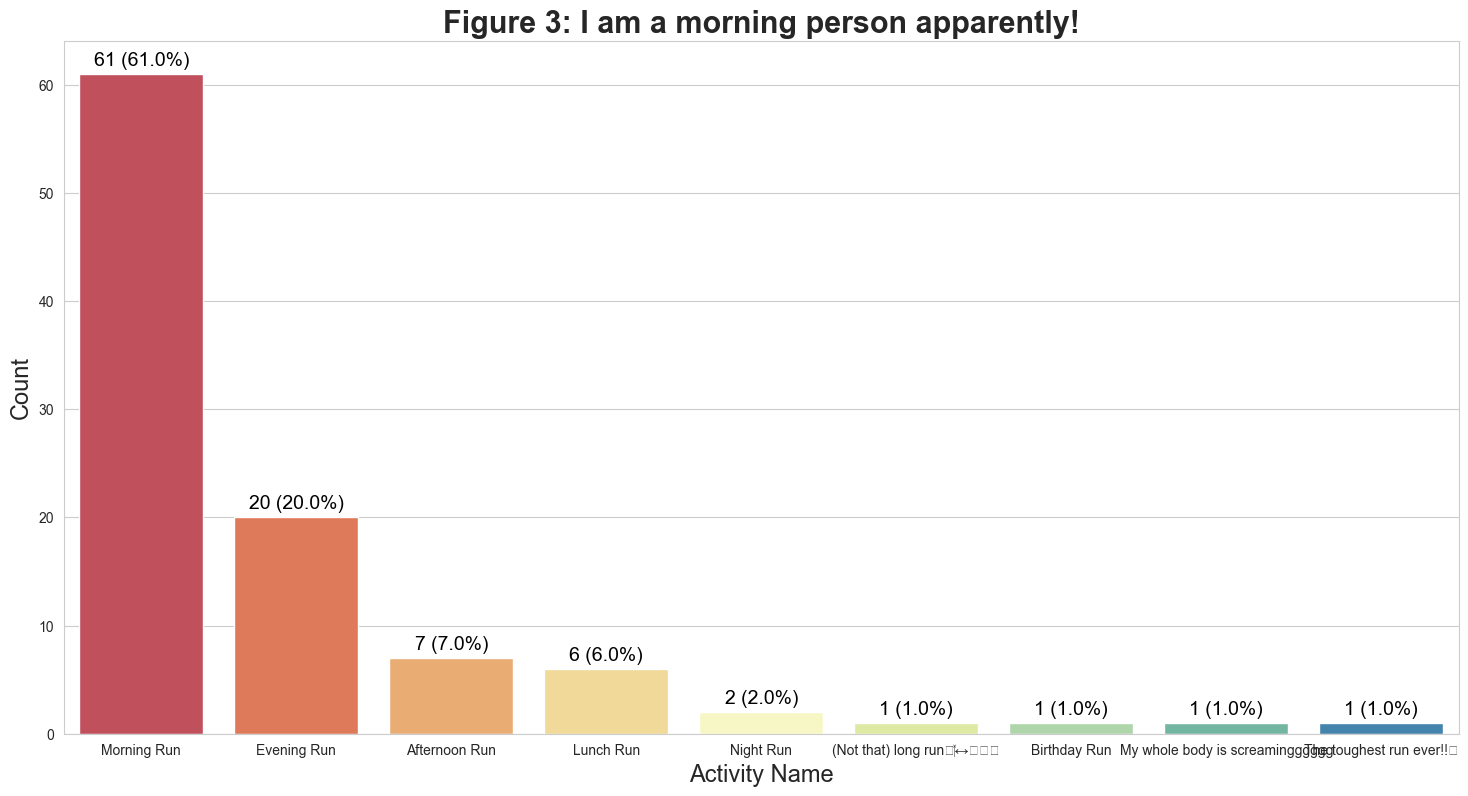

In [936]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize = (18,9))
activity_name_count = df_cleaned['Activity Name'].value_counts()

sns.set_style('whitegrid')
ax = sns.countplot(x = 'Activity Name', data = df_cleaned, palette = 'Spectral', 
                   order = activity_name_count.index)

for i, v in enumerate(activity_name_count):
    ax.text(i,v+0.8, f'{v} ({(v/activity_name_count.sum())*100:.1f}%)',
            color = 'black', ha = 'center', fontsize = 14)

plt.xlabel('Activity Name', fontsize = 17)
plt.ylabel('Count', fontsize = 17)
plt.title('Figure 3: I am a morning person apparently!', fontsize = 22, fontweight = 'bold')
plt.show()


### (2.4) Two-Variable Visualisation

####  Boxplots of Pace and Distance by Time of the Day

Now I’m curious whether the time of day affects my pace and distance. Based on the boxplots:

* Figure 4 shows that my pace remains relatively consistent across different times of day, generally ranging between 6 to 7 minutes per kilometer. This suggests that time of day doesn't significantly impact my running speed.

* However, Figure 5 reveals a more noticeable pattern in running distance. I tend to run longer distances around lunch time, with the widest range of distances observed—some runs extending up to 15–16 kilometers. This pattern contrasts with the more consistent and shorter distances observed during other times, such as afternoon or evening.

One possible explanation is how Strava labels activity time. Since it classifies runs based on the finish time, my long runs—although they may start in the early morning—are often recorded as "Lunch Runs" because they extend into midday. This could explain why lunch runs appear longer on average in the dataset.

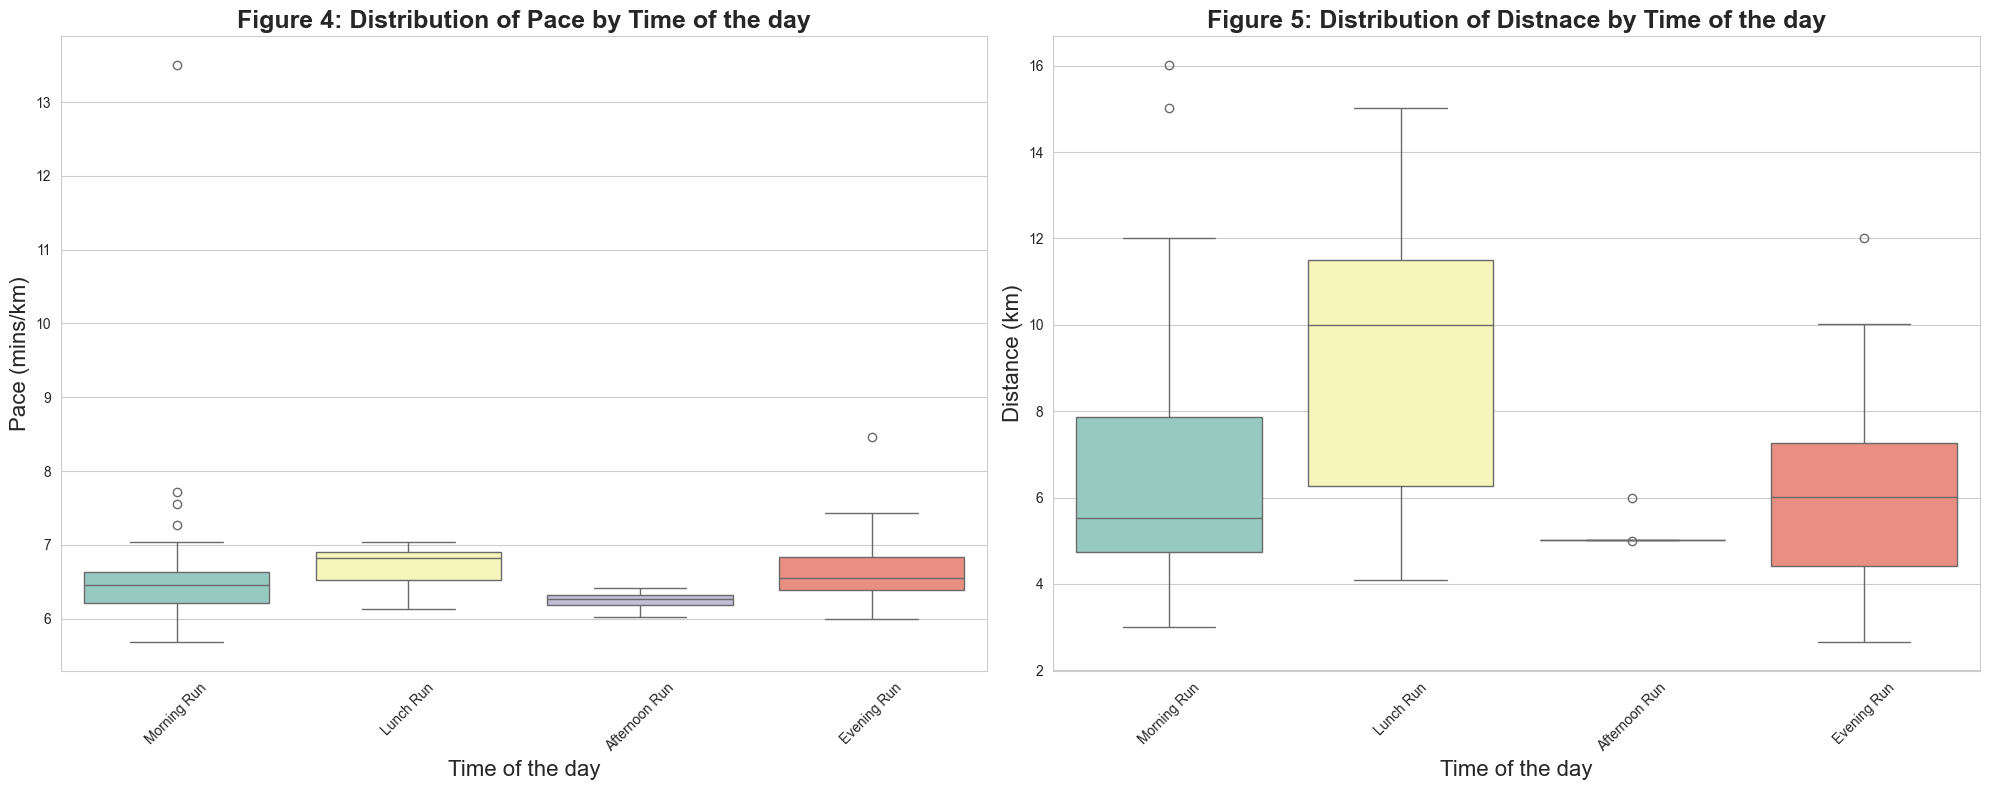

In [937]:
time_of_the_day = df_cleaned[df_cleaned["Activity Name"].isin([
    'Morning Run', 'Lunch Run', 'Afternoon Run', 'Evening Run'
])]

order = ['Morning Run', 'Lunch Run', 'Afternoon Run', 'Evening Run']

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(x='Activity Name'
            , y = 'Pace (mins/km)', data = time_of_the_day, palette = 'Set3', order = order)
plt.xlabel('Time of the day', fontsize = 16)
plt.ylabel('Pace (mins/km)', fontsize = 16)
plt.title('Figure 4: Distribution of Pace by Time of the day', fontsize=18, fontweight = 'bold')
plt.xticks(rotation = 45)

plt.subplot(1,2,2)
sns.boxplot(x='Activity Name', y = 'Distance (km)', data = time_of_the_day, palette = 'Set3', order = order)
plt.xlabel('Time of the day', fontsize = 16)
plt.ylabel('Distance (km)', fontsize = 16)
plt.title('Figure 5: Distribution of Distnace by Time of the day', fontsize=18, fontweight = 'bold')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### Line Graph of Activity Duration Over Time

I’ve noticed that as the weather in Melbourne gets colder, it has become harder to maintain momentum during my runs. This could explain why my elapsed time has increased—indicating that while I’m covering similar distances at roughly the same pace, I’m likely pausing more frequently during colder months.

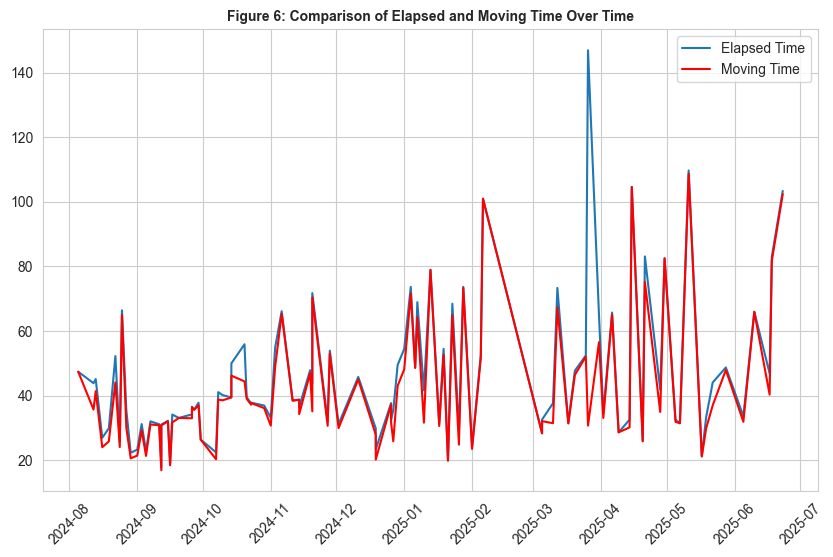

In [938]:
plt.figure(figsize=(10,6))
plt.plot('Activity Date', 'Elapsed Time (mins)', label = 'Elapsed Time', data = df_cleaned)
plt.plot('Activity Date', 'Moving Time (mins)', label = 'Moving Time', data = df_cleaned, color = 'red')
plt.title('Figure 6: Comparison of Elapsed and Moving Time Over Time', fontsize = 10, fontweight ='bold')
plt.legend()
plt.xticks(rotation = 45)
plt.show()

The line graphs above illustrate the comparison between elapsed time and moving time over time. From March to May, as the weather cooled, we can see a noticeable increase in elapsed time compared to the warmer summer months. This suggests more breaks or delays during runs, likely due to weather conditions.

That said, the sharp spike in elapsed time around April is likely an outlier—probably caused by forgetting to turn off Strava after completing a run.



#### Scatter Plot of Elevation Gain and Pace

Next, let’s explore other factors that might influence my running performance. One variable worth investigating is elevation gain—to see whether inclines and hills slow me down. Let’s take a closer look at this relationship in the next visualization.

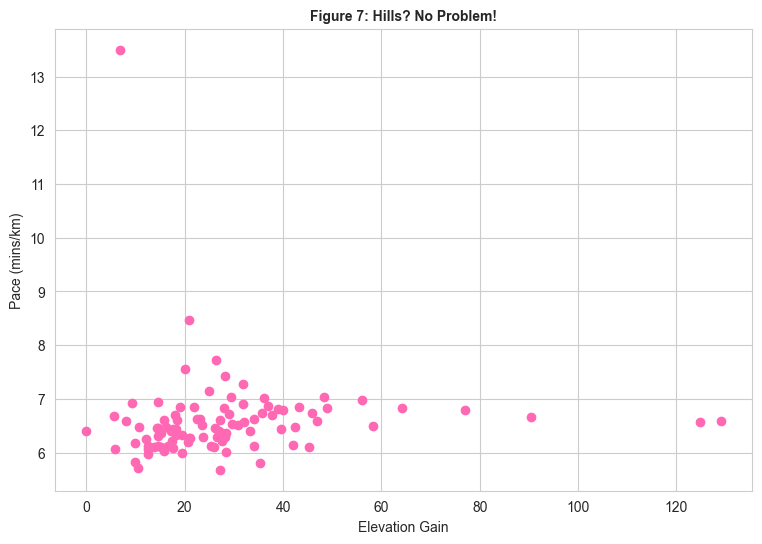

In [939]:
plt.figure(figsize=(9,6))
plt.scatter(df_cleaned['Elevation Gain'], df_cleaned['Pace (mins/km)'], alpha =1, color = 'hotpink')
plt.title('Figure 7: Hills? No Problem!', fontsize = 10, fontweight = 'bold')
plt.xlabel('Elevation Gain')
plt.ylabel('Pace (mins/km)')
plt.show()

The scatter plot reveals that uphill running does not significantly slow me down! Even when the elevation gain is high, my pace consistently stays under 7 minutes per kilometer. 

### (2.5) Three-Variable Visualisation

#### Bubble Chart of Distance, Pace and Average Speed

To improve my running performance, I wanted to explore whether my speed affects how far I can run. Based on Figure 8, a few insights emerge:

* I tend to run faster on shorter distances, with my pace improving (lower minutes/km) when the distance is around 4 to 6 km.

* Interestingly, even during longer runs (over 10 km), my pace remains steady, typically staying under 7 minutes/km, which aligns with my average pace.

* The slowest pace and lowest speed occurred on the first day of my recorded runs (figure 9).

* For runs over 10 km, my average speed tends to stabilize around 8.5 to 9 km/h, showing that I can maintain a consistent effort even at longer distances.

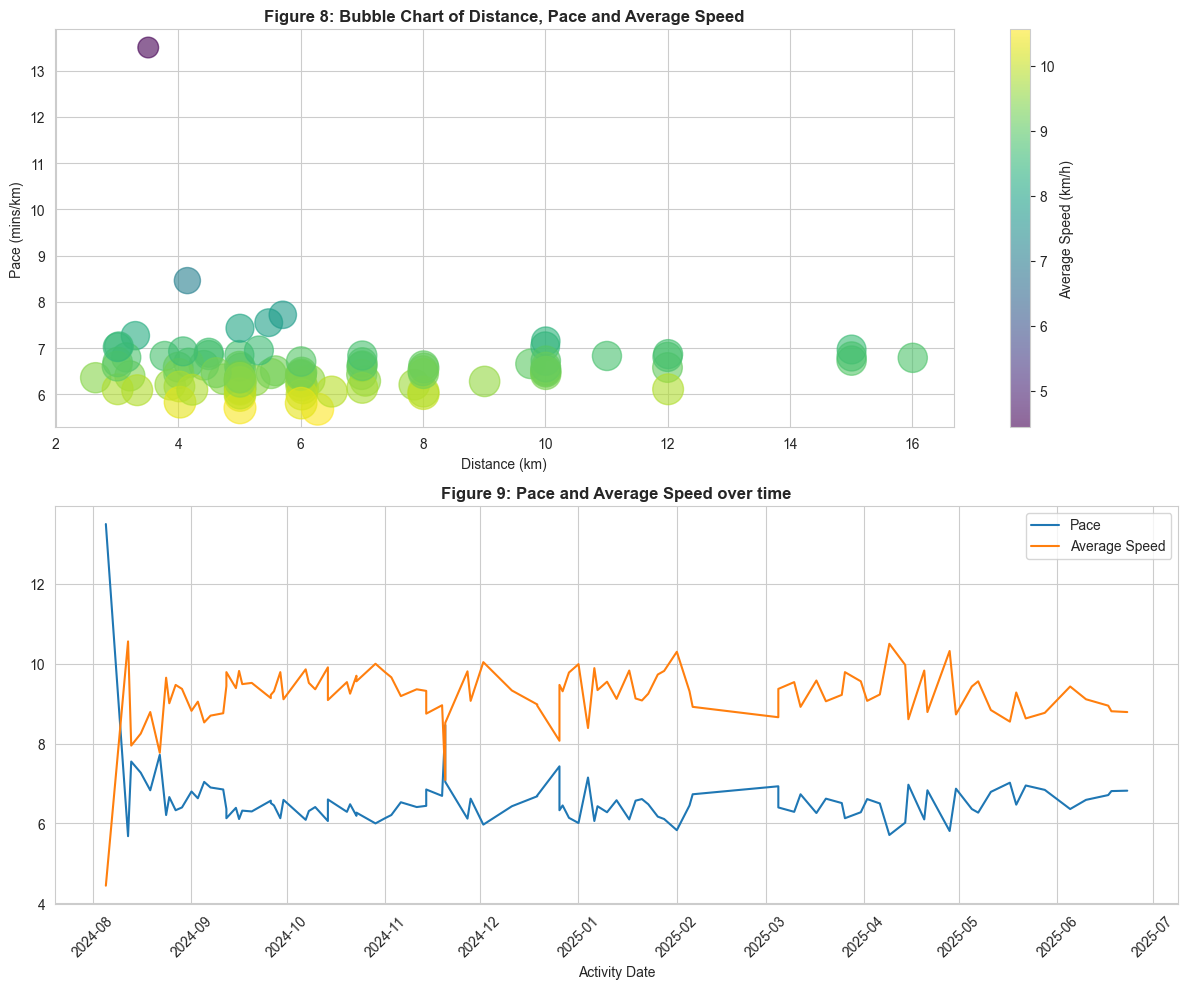

In [940]:
fig, axes = plt.subplots(2,1,figsize =(12,10))

bubble = axes[0].scatter(x = df_cleaned['Distance (km)'],
            y = df_cleaned['Pace (mins/km)'],
            s = df_cleaned['Average Speed (km/h)']*50,
            c = df_cleaned['Average Speed (km/h)'], cmap = 'viridis', alpha = 0.6)
axes[0].set_title('Figure 8: Bubble Chart of Distance, Pace and Average Speed', fontsize = 12, fontweight = 'bold')
axes[0].set_xlabel('Distance (km)')
axes[0].set_ylabel('Pace (mins/km)')
cbar = fig.colorbar(bubble, ax=axes[0])
cbar.set_label('Average Speed (km/h)')

axes[1].plot('Activity Date', 'Pace (mins/km)', label = 'Pace', data=df_cleaned)
axes[1].plot('Activity Date', 'Average Speed (km/h)', label = 'Average Speed', data=df_cleaned)
axes[1].set_title('Figure 9: Pace and Average Speed over time', fontsize=12, fontweight = 'bold')
axes[1].set_xlabel('Activity Date')
axes[1].legend()
axes[1].tick_params(axis = 'x', rotation = 45)

plt.tight_layout()
plt.show()


#### Dotplot of Pace by Time of the Day and Season

Figure 10 illustrates that my pace tends to be slower in winter, especially during morning runs, which are typically colder. Interestingly, when I run around lunchtime or in the evening during winter, my pace improves compared to the early morning. Unfortunately, my upcoming race is scheduled for the early morning—right when my performance tends to dip!

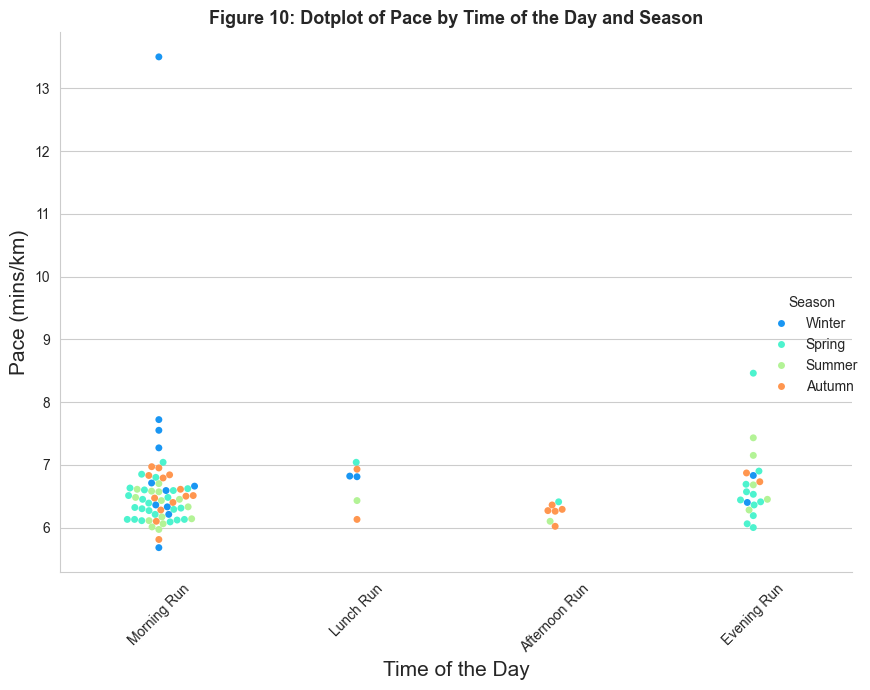

In [941]:
sns.catplot(data = time_of_the_day, x = 'Activity Name', y = 'Pace (mins/km)',
            hue = 'Season', order = order, kind = 'swarm', height= 7, aspect=1.1, palette='rainbow')
plt.title('Figure 10: Dotplot of Pace by Time of the Day and Season', fontweight = 'bold', fontsize = 13)
plt.xlabel('Time of the Day', fontsize = 15)
plt.ylabel('Pace (mins/km)', fontsize = 15)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

### (2.6) Multi-Variable Visualization

#### Heatmap of Numeric Features

The heatmap reveals that some features are highly correlated with others. To prevent multicollinearity and reduce redundancy in the machine learning process, those highly correlated features will be removed.

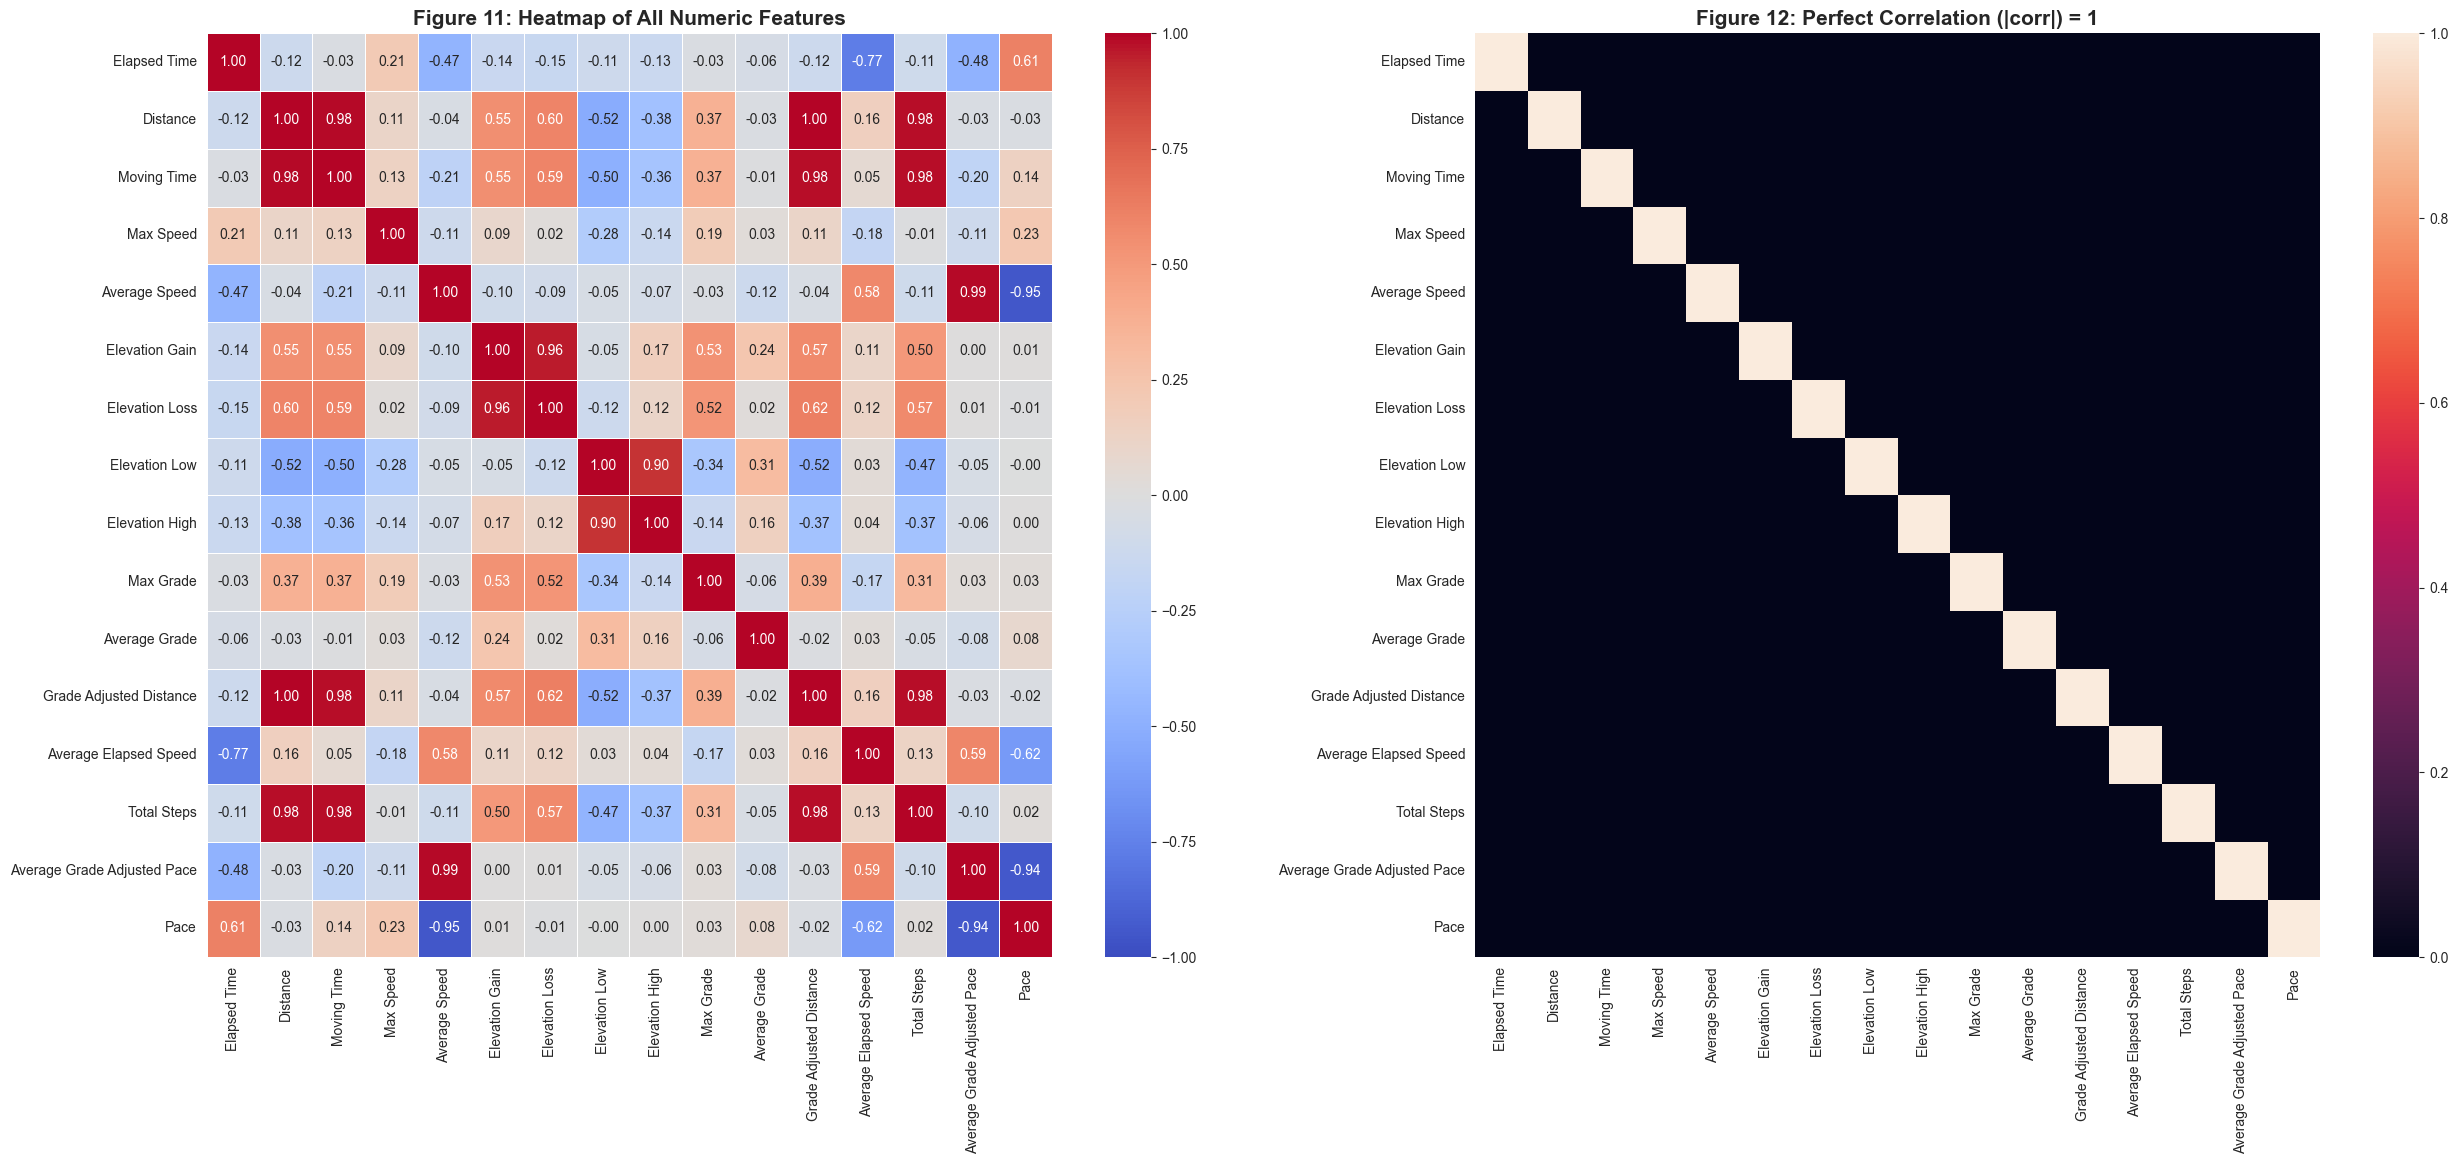

In [942]:
corr_matrix = num_cols.corr()

fig, axes = plt.subplots(1,2, figsize = (30,12))
sns.heatmap(corr_matrix, cmap='coolwarm', vmin = -1, vmax=1, center = 0,
            annot = True, fmt=".2f", linewidths=0.5, ax = axes[0])
axes[0].set_title('Figure 11: Heatmap of All Numeric Features', fontsize =15, fontweight = 'bold')
sns.heatmap(np.abs(corr_matrix) ==1, ax = axes[1])
axes[1].set_title('Figure 12: Perfect Correlation (|corr|) = 1', fontsize =15, fontweight ='bold')
plt.show()

In [943]:
# Removing some highly correlated features before machine learning processes
df_final = df_cleaned.drop(columns=['Grade Adjusted Distance', 'Total Steps', 'Average Grade Adjusted Pace', 'Moving Time (mins)', 'Elevation Loss'])

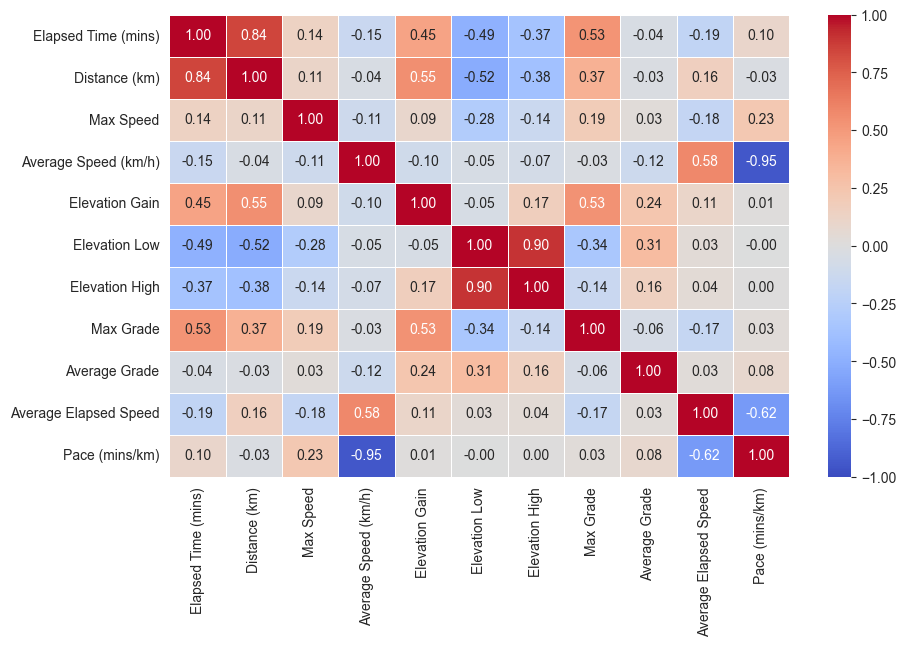

In [944]:
num_cols_final = df_final.select_dtypes(include=['int64', 'float64'])
corr_matrix_final = num_cols_final.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix_final, cmap='coolwarm', vmin = -1, vmax=1, center = 0,
            annot = True, fmt=".2f", linewidths=0.5)
plt.show()

In [945]:
df_final.head()

,Activity Date,Activity Name,Activity Type,Elapsed Time (mins),Distance (km),Max Speed,Average Speed (km/h),Elevation Gain,Elevation Low,Elevation High,Max Grade,Average Grade,Average Elapsed Speed,Pace (mins/km),Season
0,2024-08-05,Morning Run,Run,47.40,3.51,11.488000,4.44,6.900000,9.500000,16.500000,15.341868,-0.017053,0.005803,13.50,Winter
1,2024-08-12,Morning Run,Run,43.85,6.28,16.093945,10.56,27.132763,9.500000,18.299999,12.643749,0.004777,2.386788,5.68,Winter
2,2024-08-13,Morning Run,Run,45.13,5.48,4.606055,7.95,20.094465,9.500000,17.600000,15.306428,-0.007298,2.023955,7.55,Winter
3,2024-08-16,Morning Run,Run,26.92,3.30,4.147998,8.25,31.823040,44.900002,53.099998,7.954543,0.169244,2.048811,7.27,Winter
4,2024-08-19,Evening Run,Run,29.87,3.78,4.518018,8.79,27.883493,44.900002,52.900002,13.268985,0.137502,2.110357,6.83,Winter


#### Pair Plot of Numeric Features

The pair plot reveals that a few features exhibit positive and negative relationships, while some show little to no apparent correlation with others.

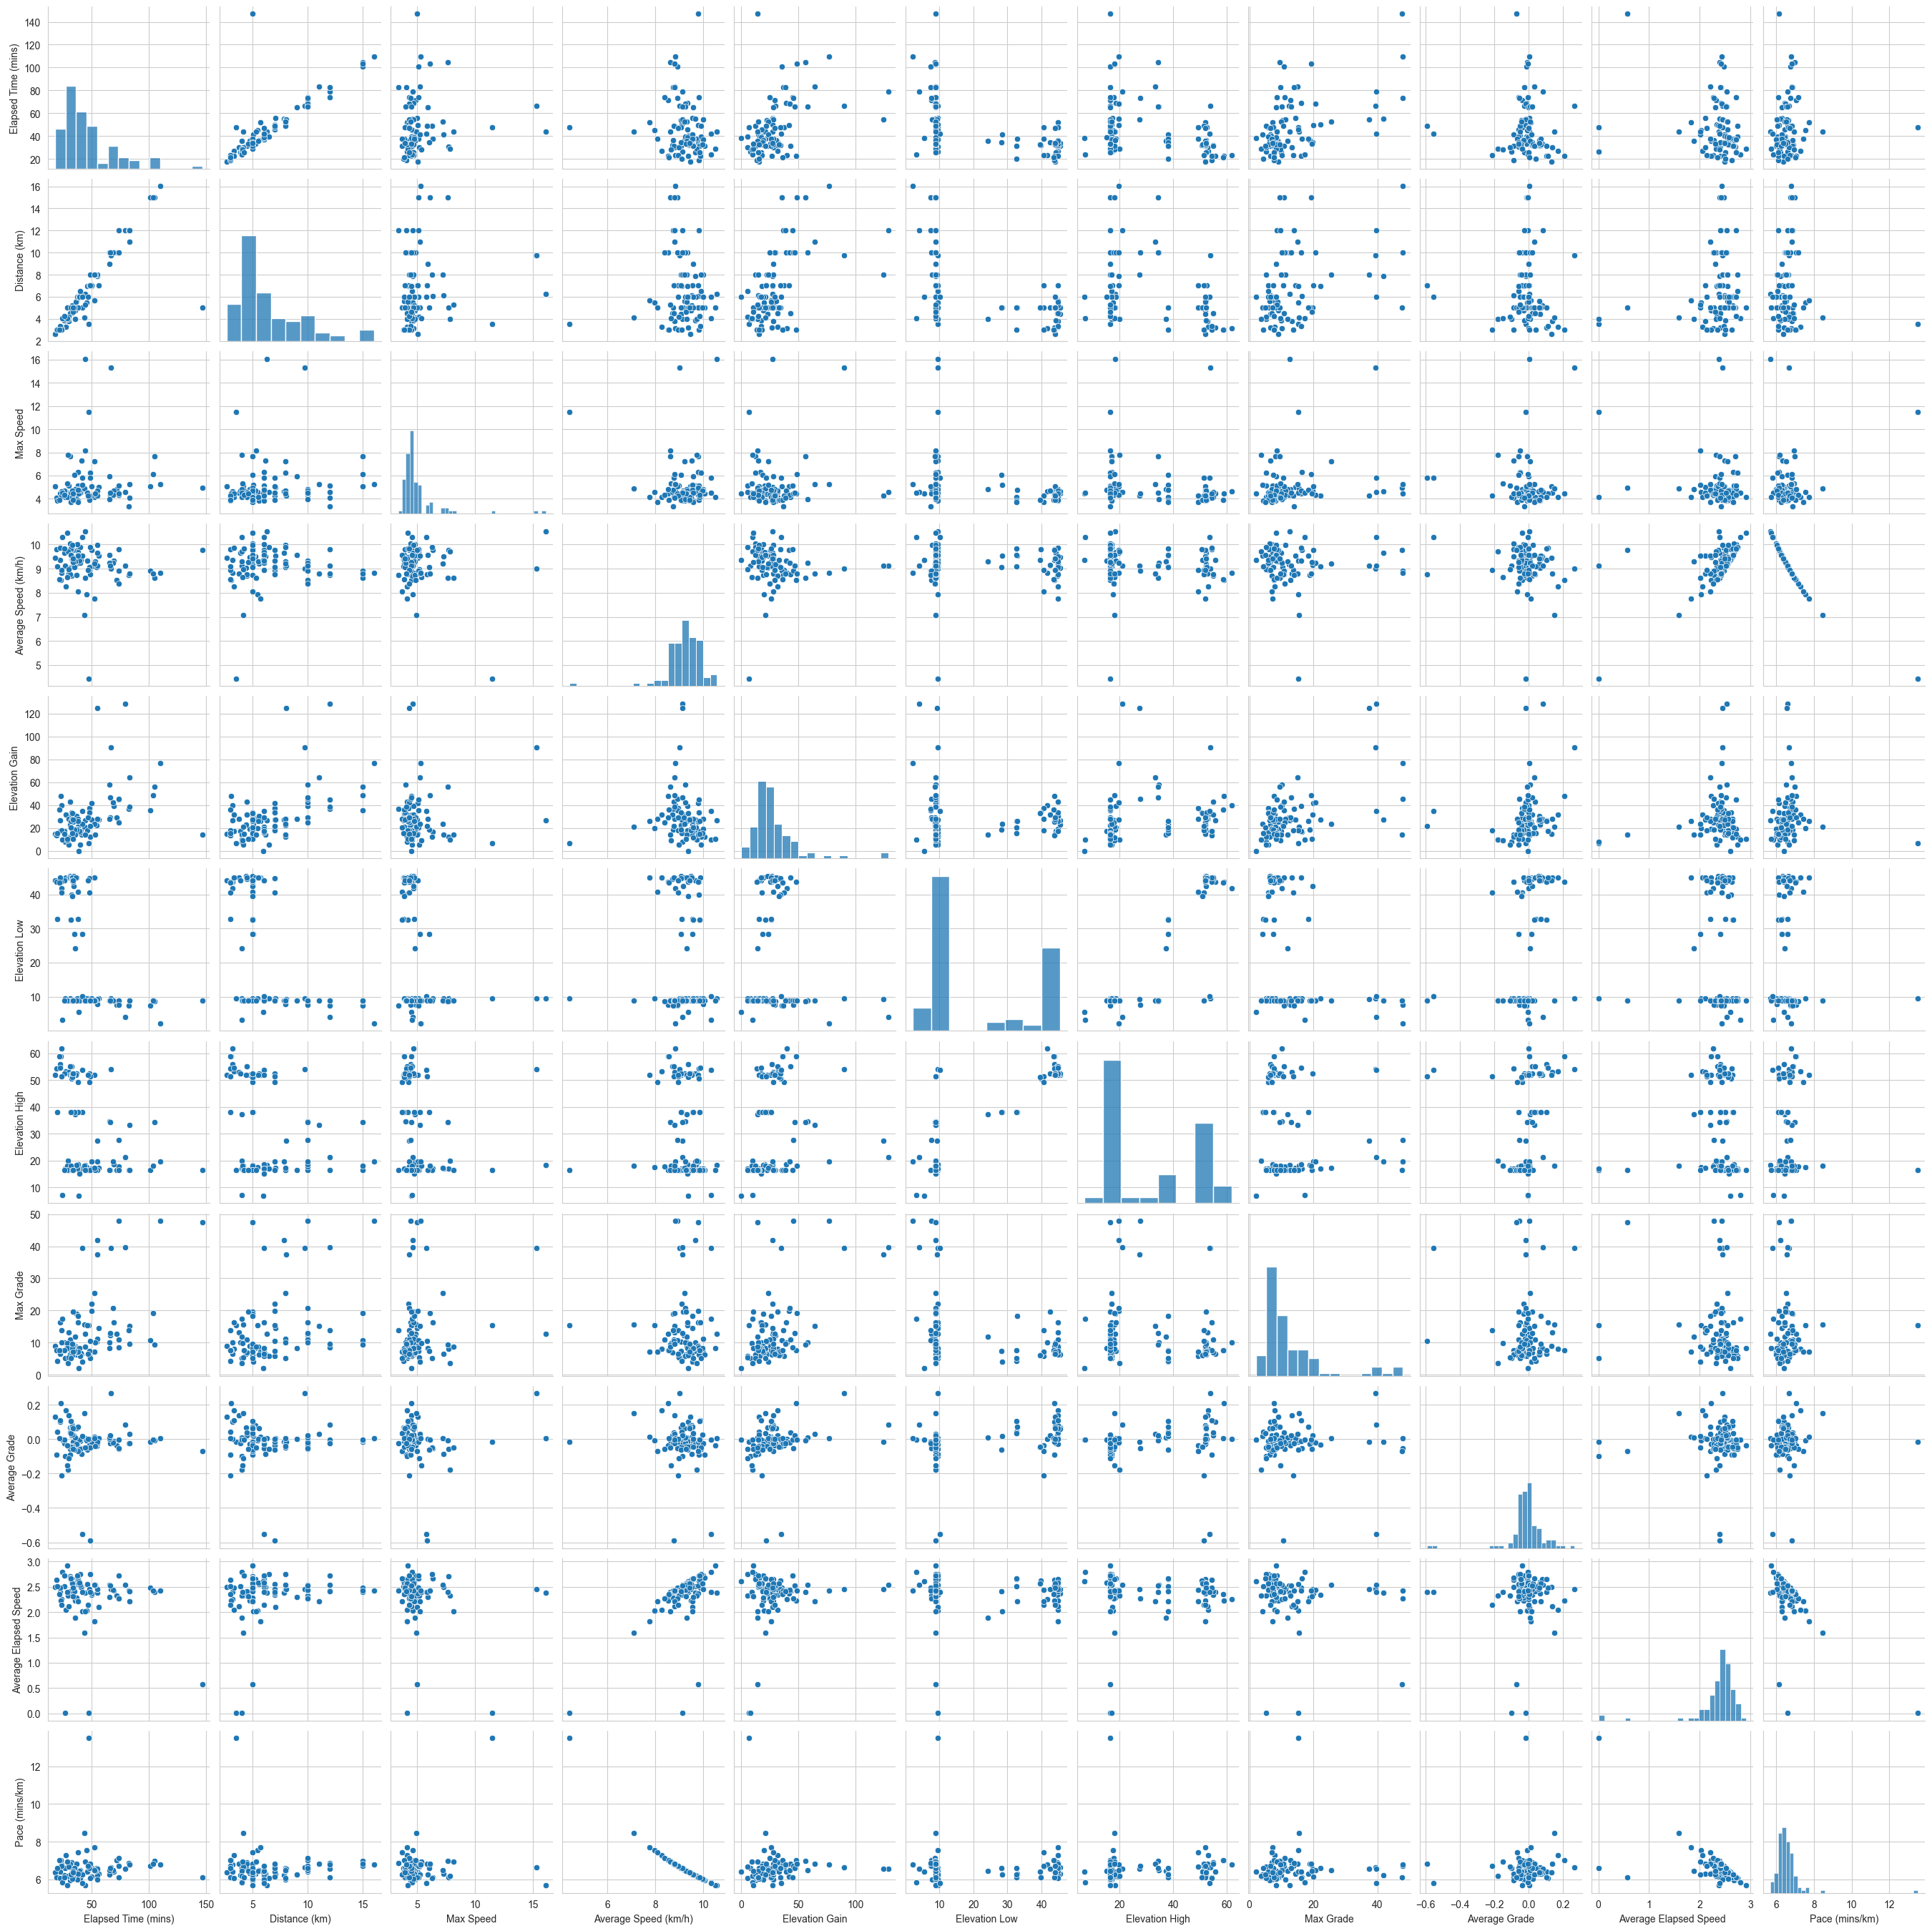

In [946]:
sns.pairplot(num_cols_final)
plt.show()

#### Histogram of Numeric Features

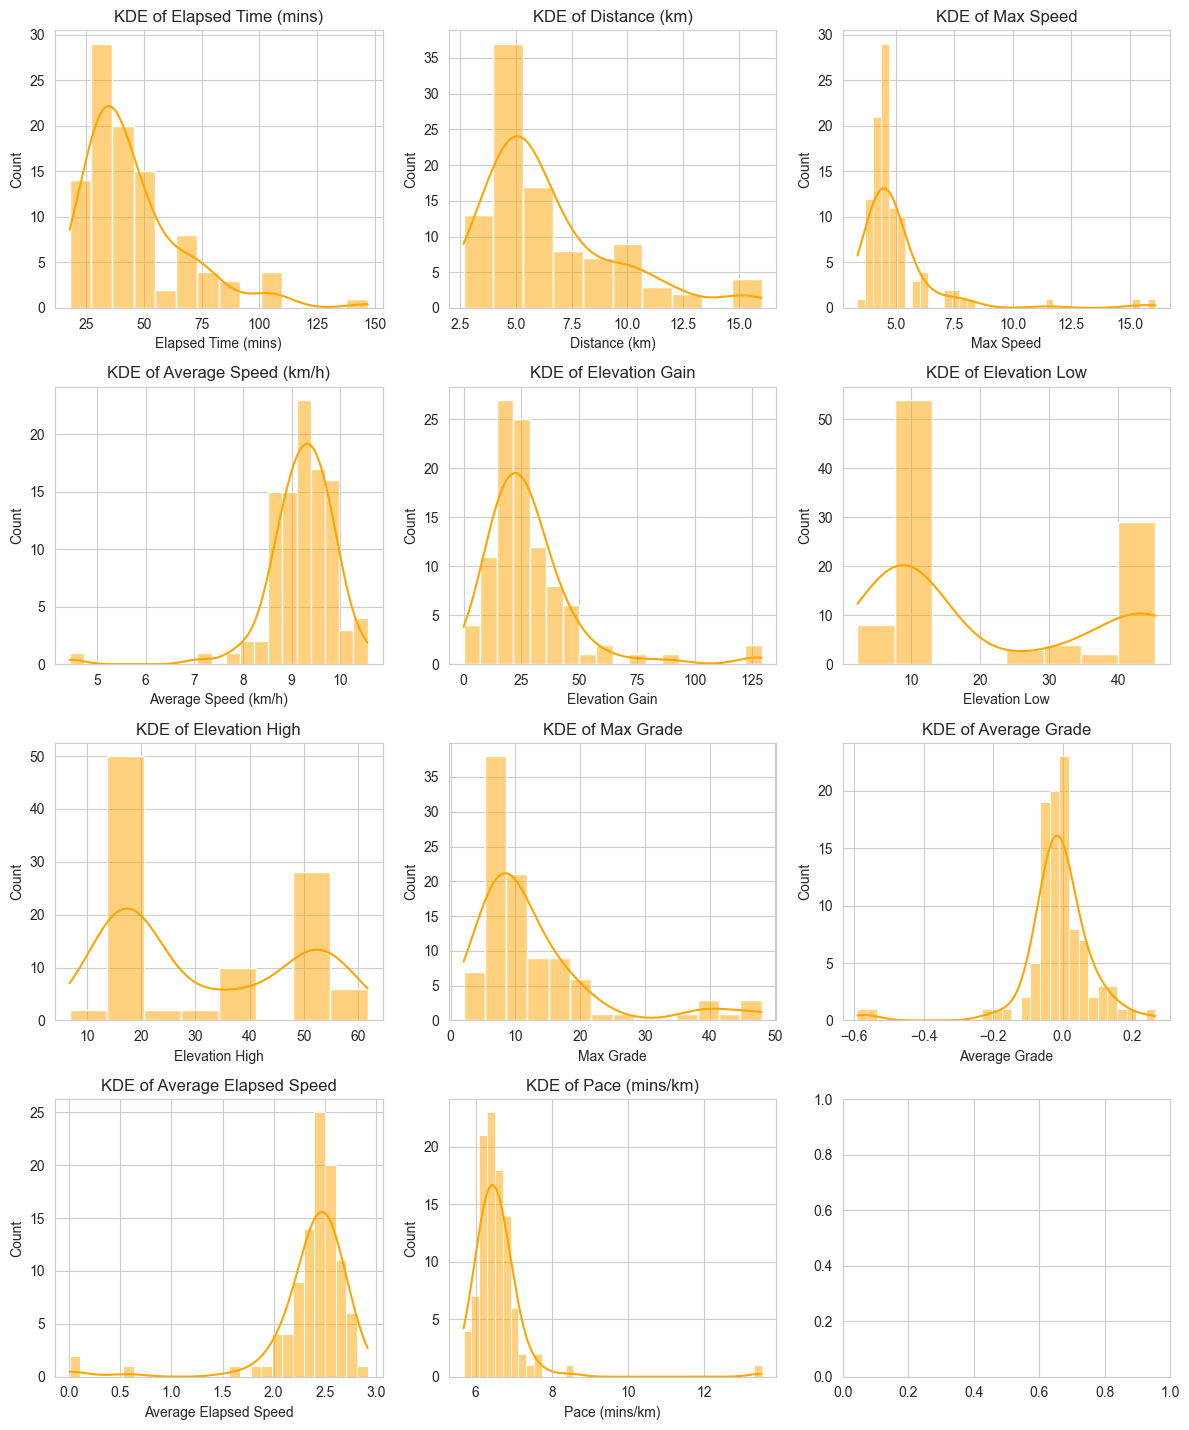

In [947]:
fig,axes = plt.subplots(4,3,figsize = (12,15))
axes = axes.flatten()


for i, col in enumerate(num_cols_final):
    sns.histplot(x = df_final[col], ax = axes[i], kde = True, color = 'orange')
    axes[i].set_title(f'KDE of {col}', fontsize = 12)

for j, in range(len(num_cols_final), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
    